# Load the required libararies

In [1]:
%load_ext autoreload
%autoreload 2

In [203]:
import pandas as pd
from data_sampling import data_sampling
from data_processing_cleaning import *
import matplotlib.pyplot as plt
import seaborn as sns
from visualizations import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from training import *

# Load the Main data set

Imagine standing at the check-out counter at the grocery store with a long line behind you and the cashier not-so-quietly announces that your card has been declined. In this moment, you probably aren’t thinking about the data science that determined your fate.

Embarrassed, and certain you have the funds to cover everything needed for an epic nacho party for 50 of your closest friends, you try your card again. Same result. As you step aside and allow the cashier to tend to the next customer, you receive a text message from your bank. “Press 1 if you really tried to spend $500 on cheddar cheese.”

While perhaps cumbersome (and often embarrassing) in the moment, this fraud prevention system is actually saving consumers millions of dollars per year. Researchers from the IEEE Computational Intelligence Society (IEEE-CIS) want to improve this figure, while also improving the customer experience. With higher accuracy fraud detection, you can get on with your chips without the hassle.

IEEE-CIS works across a variety of AI and machine learning areas, including deep neural networks, fuzzy systems, evolutionary computation, and swarm intelligence. Today they’re partnering with the world’s leading payment service company, Vesta Corporation, seeking the best solutions for fraud prevention industry, and now you are invited to join the challenge.

In this competition, you’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

Acknowledgements:



Vesta Corporation provided the dataset for this competition. Vesta Corporation is the forerunner in guaranteed e-commerce payment solutions. Founded in 1995, Vesta pioneered the process of fully guaranteed card-not-present (CNP) payment transactions for the telecommunications industry. Since then, Vesta has firmly expanded data science and machine learning capabilities across the globe and solidified its position as the leader in guaranteed ecommerce payments. Today, Vesta guarantees more than $18B in transactions annually.

Header Photo by Tim Evans on Unsplash

In [147]:
#data_transaction_all = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
#data_identity_all = pd.read_csv('ieee-fraud-detection/train_identity.csv')

### Get a sample dataset from the main dataset

In [148]:
#data_sampling(data_transaction_all, data_identity_all, sampling_number=50000)
#del data_transaction_all, data_identity_all
#df_IEEE = pd.read_csv('Data/Sampled_IEEE_data.csv')
#print(df_IEEE.shape)
#df_IEEE.head()

The shape of the main data frame is: (590540, 435)
(50000, 435)


### Processing Data for EDA

In [ ]:
# Reduce the memory usage of the input dataframe
df_IEEE = reduce_mem_usage(df_IEEE, verbose=True)

In [ ]:
#What type of data we have on our data?
resumetable(df_IEEE.iloc[:,:10])

In [ ]:
# How many cols, rows, missing values we have?
print('The number of datapoints is:', df_IEEE.shape[0])
print('The number of features is:', df_IEEE.shape[1])
print('The number of columns with missing values', sum(df_IEEE.isna().sum() != 0))
print('The number of columns with more than 70% missing values', sum(df_IEEE.isna().sum() > 0.7 * df_IEEE.shape[0]))

In [ ]:
# Clean the data for plotting and EDA
df_IEEE = data_cleaning_for_EDA(df_IEEE)

In [ ]:
# What's the Transactions values distribution of fraud and no fraud transactions?
plot_distributions_target(df_IEEE)

As seen, the dataset is highly imbalanced and about 96.5% of the data belongs to the "No Fraud" class.

In addition, about 95.6% of the total transactions are not fraud while 4.15% of transactions are fraud.

What features or target shows some interesting patterns?

In [ ]:
transactions_distribution(df_IEEE)
plt.show()

## To remove outliers

In [ ]:
# lets a look at the quantile of the "TransactionAmt"
#df_IEEE['TransactionAmt'] = df_IEEE['TransactionAmt'].astype(float)
print("Transaction Amounts Quantiles:")
print(df_IEEE['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

In [ ]:
# plt.figure(figsize = (12, 6))
# df_IEEE_WO = df_IEEE.loc[df_IEEE['TransactionAmt'] < df_IEEE['TransactionAmt'].quantile(0.99)]

# sns.violinplot(y = 'TransactionAmt', data= df_IEEE_WO, orient = 'v', x='isFraud');

In [ ]:
df_IEEE  = remove_otliers(df_IEEE, ['TransactionAmt'])

### ProductCD Feature

In [ ]:
#Distribution of Products
#Distribution of Frauds by Product
Distribution_feature_fraud(df_IEEE, 'ProductCD', rotation = 0, feature_distribution=True)

 W, C and R are the most frequent values.
 
For W, H, and R, the distribution of Fraud values are slightly higher than the Non-Fraud Transactions

### Card 4 Feature

In [ ]:
#Distribution of Card 4
#Distribution of Frauds by Card 4
Distribution_feature_fraud(df_IEEE.copy(), 'card4', loc = 1)

The highest fraud is for discover

### Card 6 Feature

In [ ]:
#Distribution of Card 6
#Distribution of Frauds by Card 6
Distribution_feature_fraud(df_IEEE.copy(), 'card6', loc = 1)

The highest percentage of fraud is for credit card.

### M features

In [ ]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    Distribution_feature_fraud(df_IEEE, col)

We can see that the highest percentage of fraud is for always for missing values (but not for M4)

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'R_emaildomain', rotation = 30, feature_distribution=False)

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'P_emaildomain', rotation = 30, feature_distribution=False)

For both "P_emaildomain" and "R_emaildomain", the highest percentage of Fraud is for google and Microsoft

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'addr1', rotation = 30, feature_distribution=False)

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'addr2', rotation = 30, feature_distribution=True)

Almost all entries in Addr2 are in the same value (87).

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'C1', rotation = 0, feature_distribution=True)

In [ ]:
Distribution_feature_fraud(df_IEEE.copy(), 'C2', rotation = 30, feature_distribution=True)

In [11]:
del df_IEEE

# Feature Engineering and Training 

### Load Data

In [183]:
df_IEEE = pd.read_csv('Data/Sampled_IEEE_data.csv')

# Reduce the memory usage of the input dataframe
#df_IEEE = reduce_mem_usage(df_IEEE, verbose=True)
y = df_IEEE['isFraud']
X = df_IEEE.drop(columns = 'isFraud', axis = 1)

In [210]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1364)
#del df_IEEE

### Feature Engineering

In [211]:
#This function is used to generate new features
#Note that this function deals with train and test datasets to prevent form data leakage
X_train, X_test = Feature_Engineering(X_train, X_test)
# X_train = reduce_mem_usage(X_train, verbose=True)
# X_test = reduce_mem_usage(X_test, verbose=True)


### Principal Component Analysis for Dimensionality Reduction

There are about 339 v features in data. We are going to use PCA to reduce the dimmesion of these features 

In [212]:
#features started with v
v_features = X_train.columns[54:393]

The explained variance using 30 components is 98.0%


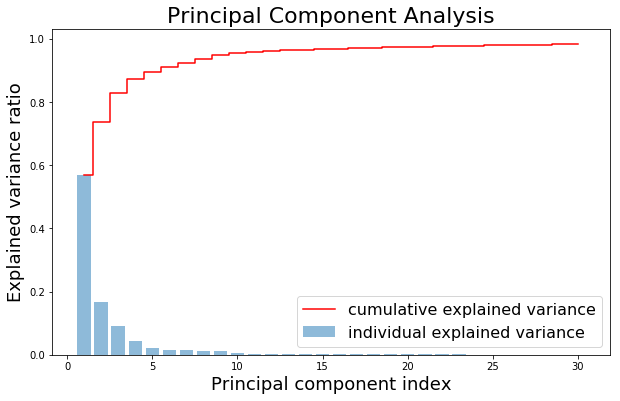

In [213]:
X_train, X_test = PCA_Dimensionality_Reduction(X_train.copy(),
                                               X_test.copy(), 
                                               v_features, 
                                               n_components=30, 
                                               plot_pca = True)

As seen using 30 components explains more than 98.0% of the variability in the data.

Hence, we use the 30 first principal components, instead of v features, in dataframe.

### Missing Values

#### Drop columns with more than 90% missing values

In [214]:
X_train, X_test = data_cleaning_for_training(X_train, X_test)

#### Dealing with the rest of missing values

In [215]:
# Filling the rest of missing values
X_train, X_test = fill_na_values(X_train, X_test)

### Convert categorical variable into dummy/indicator variables.

In [216]:
#X_train, X_test = Convert_categorical_variables(X_train, X_test)
X_train_LabelEncoder, X_test_LabelEncoder = Convert_LabelEncoder(X_train.copy(), X_test.copy())